In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ast

import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# DATA
movies_df = pd.read_csv('drive/MyDrive/MovieSummaries/plot_summaries.txt', sep="\t", header=None)
movies_df.columns = ["Wikipedia movie ID", "movie_summary"]

character_metadata_df = pd.read_csv('drive/MyDrive/MovieSummaries/character.metadata.tsv',sep='\t', header=None)
character_metadata_df.columns = ["Wikipedia_movie_ID", "Freebase movie ID", "Movie release date",
                                 "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)",
                                 "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release",
                                 "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

movie_metadata_df = pd.read_csv('drive/MyDrive/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
movie_metadata_df.columns = ["Wikipedia_movie_ID", "Freebase movie ID", "Movie name", "Movie release date",
                             "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)",
                             "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]


# Базовые статистики по фильмам

In [3]:
movie_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Wikipedia_movie_ID                         81741 non-null  int64  
 1   Freebase movie ID                          81741 non-null  object 
 2   Movie name                                 81741 non-null  object 
 3   Movie release date                         74839 non-null  object 
 4   Movie box office revenue                   8401 non-null   float64
 5   Movie runtime                              61291 non-null  float64
 6   Movie languages (Freebase ID:name tuples)  81741 non-null  object 
 7   Movie countries (Freebase ID:name tuples)  81741 non-null  object 
 8   Movie genres (Freebase ID:name tuples)     81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [4]:
movie_metadata_df.describe(include='all')

,Wikipedia_movie_ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
count,8.174100e+04,81741,81741,74839,8.401000e+03,6.129100e+04,81741,81741,81741
unique,NaN,81741,75478,20389,NaN,NaN,1817,2124,23817
top,NaN,/m/03vyhn,Alice in Wonderland,2006,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
freq,NaN,1,17,1011,NaN,NaN,33748,30300,6851
mean,1.740784e+07,NaN,NaN,NaN,4.799363e+07,1.118192e+02,NaN,NaN,NaN
std,1.098791e+07,NaN,NaN,NaN,1.121753e+08,4.360070e+03,NaN,NaN,NaN
min,3.300000e+02,NaN,NaN,NaN,1.000000e+04,0.000000e+00,NaN,NaN,NaN
25%,7.323695e+06,NaN,NaN,NaN,2.083193e+06,8.100000e+01,NaN,NaN,NaN
50%,1.777899e+07,NaN,NaN,NaN,1.063969e+07,9.300000e+01,NaN,NaN,NaN
75%,2.715573e+07,NaN,NaN,NaN,4.071696e+07,1.060000e+02,NaN,NaN,NaN


## Распределения признаков в датасете с фильмами

### Распределение по году выпуска фильмов

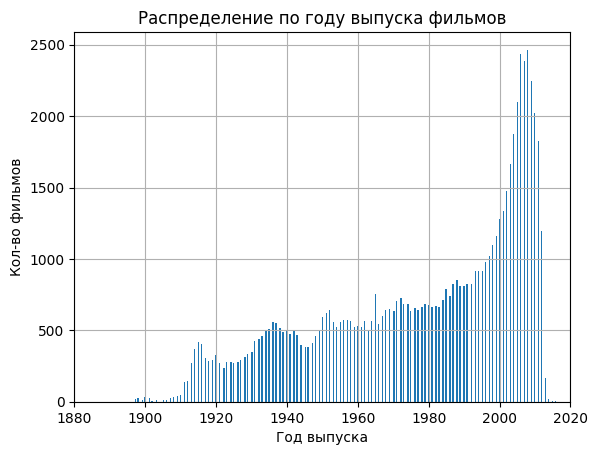

In [5]:
movie_metadata_df['Movie release date year'] = movie_metadata_df['Movie release date'].apply(lambda x: int(x[:4]) if not pd.isnull(x) else x)
# Откидываем выбросы (первые фильмы появляются с 1896)
movie_metadata_df = movie_metadata_df[movie_metadata_df['Movie release date year'] > 1896]
movie_metadata_df['Movie release date year'].hist(bins=300)
plt.title('Распределение по году выпуска фильмов')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во фильмов')
plt.xlim(1880, 2020)
plt.show()

### График плотности распределения вероятности кассовых сборов фильмов

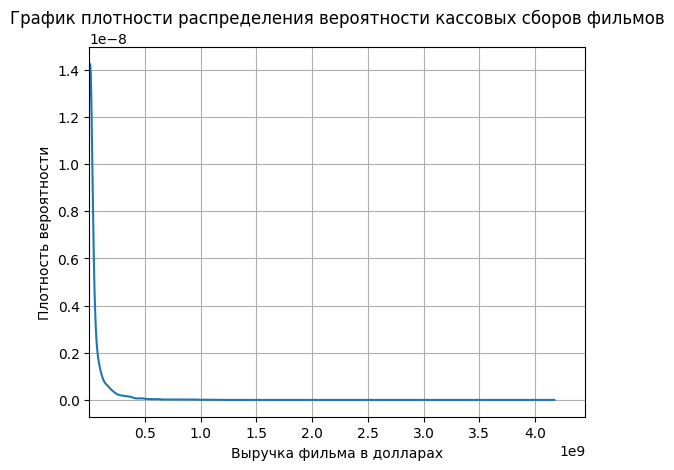

In [6]:
movie_metadata_df['Movie box office revenue'].plot.kde(ind=1000)
plt.title('График плотности распределения вероятности кассовых сборов фильмов')
plt.xlabel('Выручка фильма в долларах')
plt.ylabel('Плотность вероятности')
plt.xlim(100000)
plt.grid()
plt.show()

У распределения тяжелый хвост, поэтому посмотрим на график с логарифмированной осью х

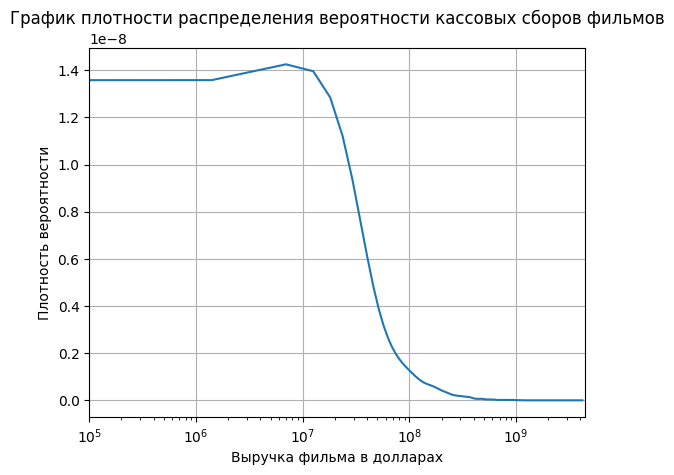

In [7]:
movie_metadata_df['Movie box office revenue'].plot.kde(ind=1000)
plt.title('График плотности распределения вероятности кассовых сборов фильмов')
plt.xlabel('Выручка фильма в долларах')
plt.ylabel('Плотность вероятности')
plt.xlim(100000)
plt.grid()
plt.xscale('log')
plt.show()

### График плотности распределения вероятности длительности фильма

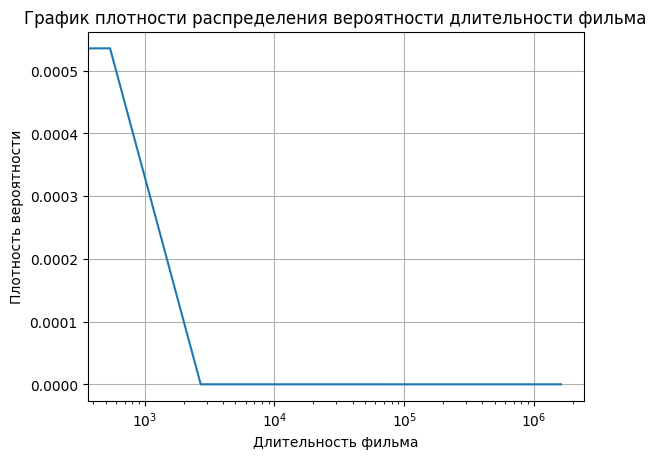

In [8]:
movie_metadata_df['Movie runtime'].plot.kde(ind=1000)
plt.title('График плотности распределения вероятности длительности фильма')
plt.xlabel('Длительность фильма')
plt.ylabel('Плотность вероятности')
plt.grid()
plt.xscale('log')
plt.show()

In [9]:
movie_metadata_df['Movie runtime'].sort_values(ascending=False).head(30)

12804    1079281.00
71100       9360.00
21733       5700.00
46666       5220.00
27036       4875.27
68223       2880.00
73658       2425.00
73630       1966.00
30259       1620.00
23843       1560.00
59048       1533.00
54975       1530.00
41910       1440.00
70955       1200.00
57255       1003.00
50076        900.00
35799        900.00
26319        891.00
29507        840.00
22961        840.00
22609        822.00
50259        780.00
46501        763.00
78048        720.00
13143        720.00
41701        700.00
10354        647.00
47286        644.00
71086        608.00
16260        600.00
Name: Movie runtime, dtype: float64

Это все похоже на выбросы, отбросим все фильмы длительностью более 500 мин

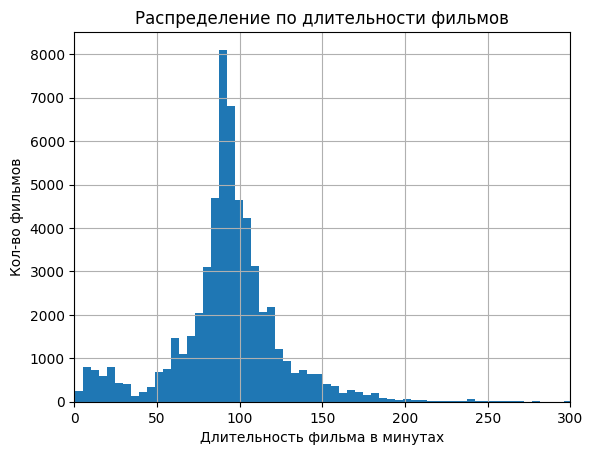

In [10]:
movie_metadata_df = movie_metadata_df[movie_metadata_df['Movie runtime'] < 500]
movie_metadata_df['Movie runtime'].hist(bins=100)
plt.xlim(0, 300)
plt.title('Распределение по длительности фильмов')
plt.xlabel('Длительность фильма в минутах')
plt.ylabel('Кол-во фильмов')
plt.show()

### Распределения по языку оригинала

Выбираем 20 самых частых языков, все остальные помещаем в одну группу (**other_languages**) из-за их маленького размера

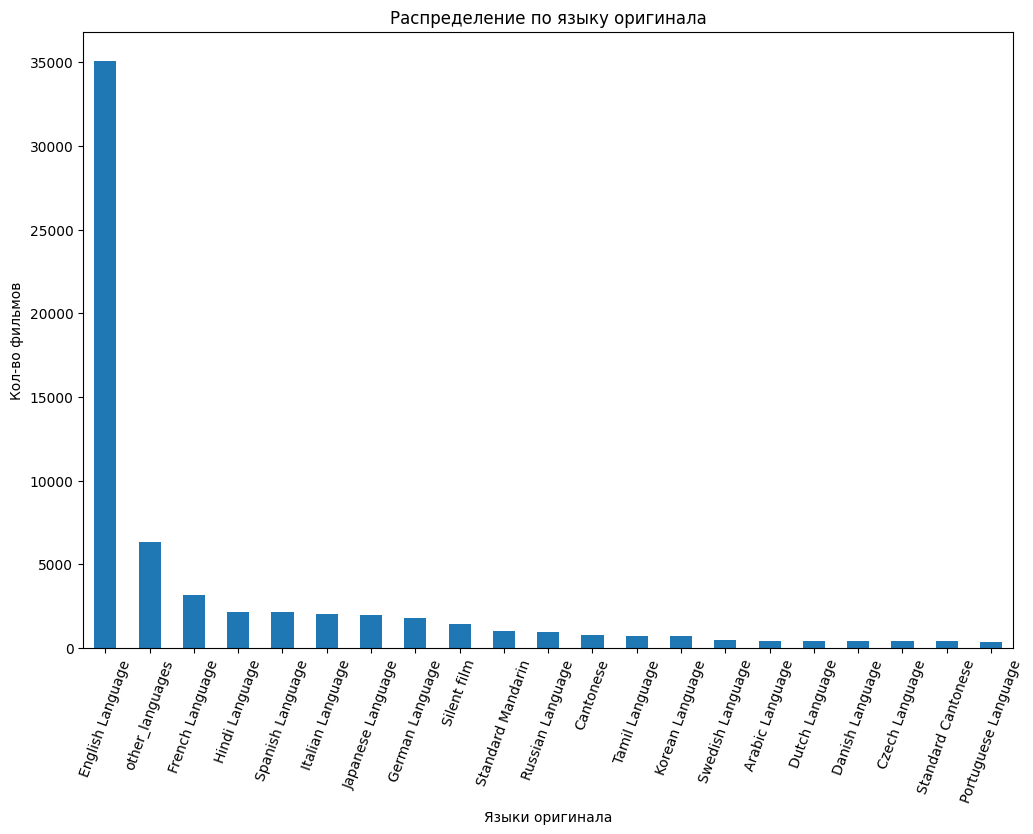

In [11]:
list_langs = pd.Series(np.hstack(movie_metadata_df['Movie languages (Freebase ID:name tuples)'].apply(lambda x: np.array(list(ast.literal_eval(x).values()))).values)).value_counts().head(20).index
pd.Series(np.hstack(movie_metadata_df['Movie languages (Freebase ID:name tuples)'].apply(lambda x: np.array(list(ast.literal_eval(x).values()))).values)).apply(lambda x: x if x in list_langs else 'other_languages').value_counts().plot(kind='bar', figsize=(12,8))
plt.title('Распределение по языку оригинала')
plt.xlabel('Языки оригинала')
plt.xticks(rotation=70)
plt.ylabel('Кол-во фильмов')
plt.show()

### Распределение наиболее популярных жанров

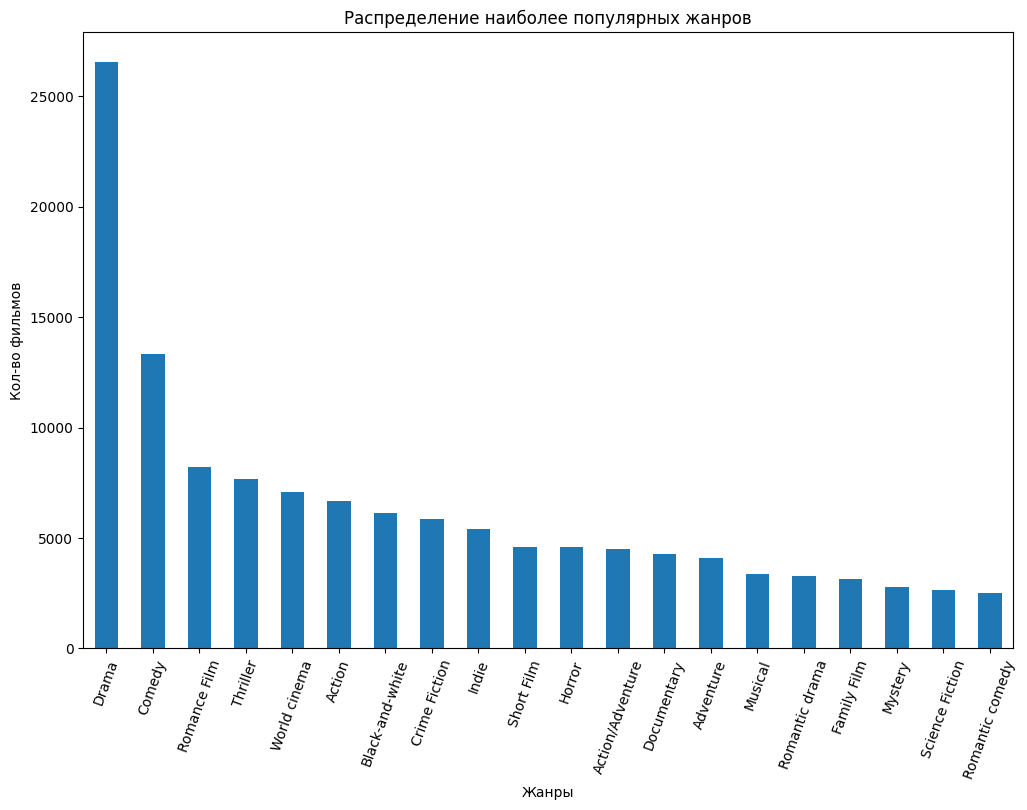

In [12]:
list_ganres = pd.Series(np.hstack(movie_metadata_df['Movie genres (Freebase ID:name tuples)'].apply(lambda x: np.array(list(ast.literal_eval(x).values()))).values)).value_counts().head(20).index
pd.Series(np.hstack(movie_metadata_df['Movie genres (Freebase ID:name tuples)'].apply(lambda x: np.array(list(ast.literal_eval(x).values()))).values)).apply(lambda x: x if x in list_ganres else np.nan).value_counts().plot(kind='bar', figsize=(12,8))
plt.title('Распределение наиболее популярных жанров')
plt.xlabel('Жанры')
plt.xticks(rotation=70)
plt.ylabel('Кол-во фильмов')
plt.show()

### Распределение по странам

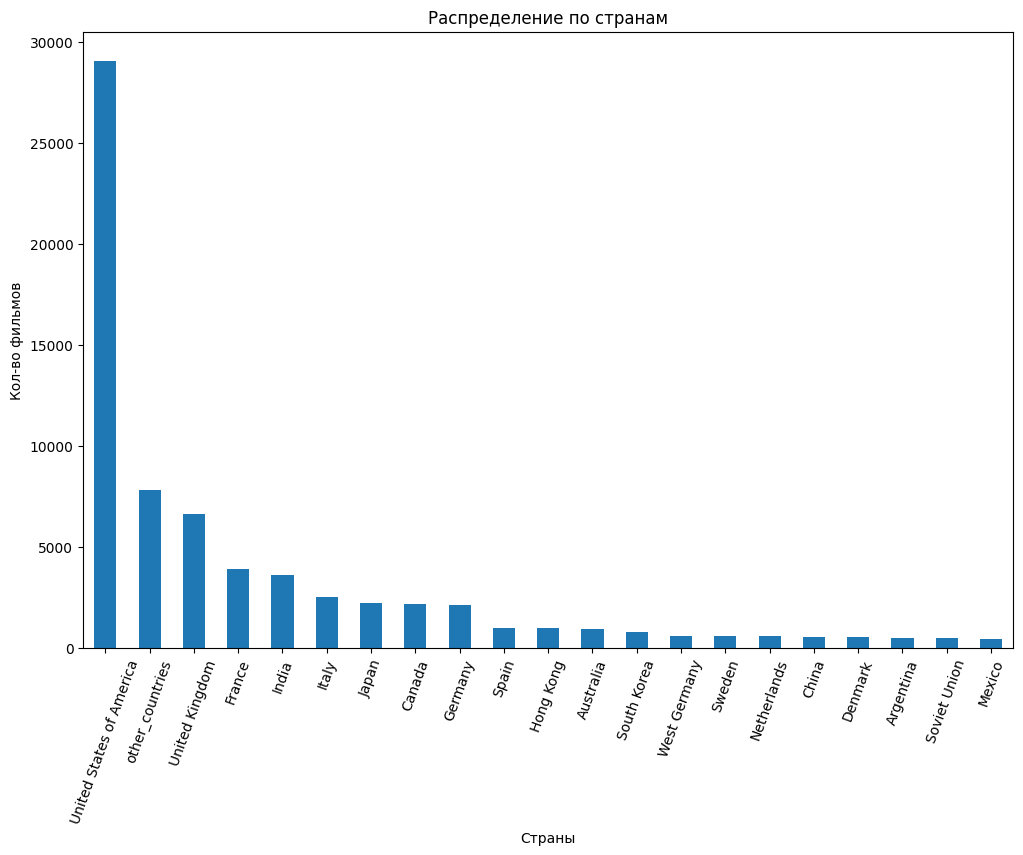

In [13]:
list_countries = pd.Series(np.hstack(movie_metadata_df['Movie countries (Freebase ID:name tuples)'].apply(lambda x: np.array(list(ast.literal_eval(x).values()))).values)).value_counts().head(20).index
pd.Series(np.hstack(movie_metadata_df['Movie countries (Freebase ID:name tuples)'].apply(lambda x: np.array(list(ast.literal_eval(x).values()))).values)).apply(lambda x: x if x in list_countries else 'other_countries').value_counts().plot(kind='bar', figsize=(12,8))
plt.title('Распределение по странам')
plt.xlabel('Страны')
plt.xticks(rotation=70)
plt.ylabel('Кол-во фильмов')
plt.show()

# Базовые статистики по персонажам

In [14]:
character_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia_movie_ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor date of birth              344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height (in meters)         154824 non-null  float64
 7   Actor ethnicity (Freebase ID)    106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [15]:
character_metadata_df.describe(include='all')

,Wikipedia_movie_ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
count,4.506690e+05,450669,440674,192794,344524,405060,154824.000000,106058,449441,292556.000000,450669,192804,449854
unique,NaN,64330,18476,126629,29494,2,NaN,479,134078,NaN,450669,183435,135760
top,NaN,/m/0cc8620,2008,Doctor,1908-05-30,M,NaN,/m/0dryh9k,Mel Blanc,NaN,/m/0bgchxw,/m/0h577m2,/m/0c5vh
freq,NaN,115,5453,198,791,270257,NaN,16351,791,NaN,1,146,791
mean,1.396975e+07,NaN,NaN,NaN,NaN,NaN,1.788893,NaN,NaN,37.788523,NaN,NaN,NaN
std,1.079662e+07,NaN,NaN,NaN,NaN,NaN,4.379940,NaN,NaN,20.587870,NaN,NaN,NaN
min,3.300000e+02,NaN,NaN,NaN,NaN,NaN,0.610000,NaN,NaN,-7896.000000,NaN,NaN,NaN
25%,3.759292e+06,NaN,NaN,NaN,NaN,NaN,1.676400,NaN,NaN,28.000000,NaN,NaN,NaN
50%,1.189065e+07,NaN,NaN,NaN,NaN,NaN,1.750000,NaN,NaN,36.000000,NaN,NaN,NaN
75%,2.366501e+07,NaN,NaN,NaN,NaN,NaN,1.830000,NaN,NaN,47.000000,NaN,NaN,NaN


## Распределения признаков в датасете с актерами/персонажами

### Распределение по топ-20 актерам

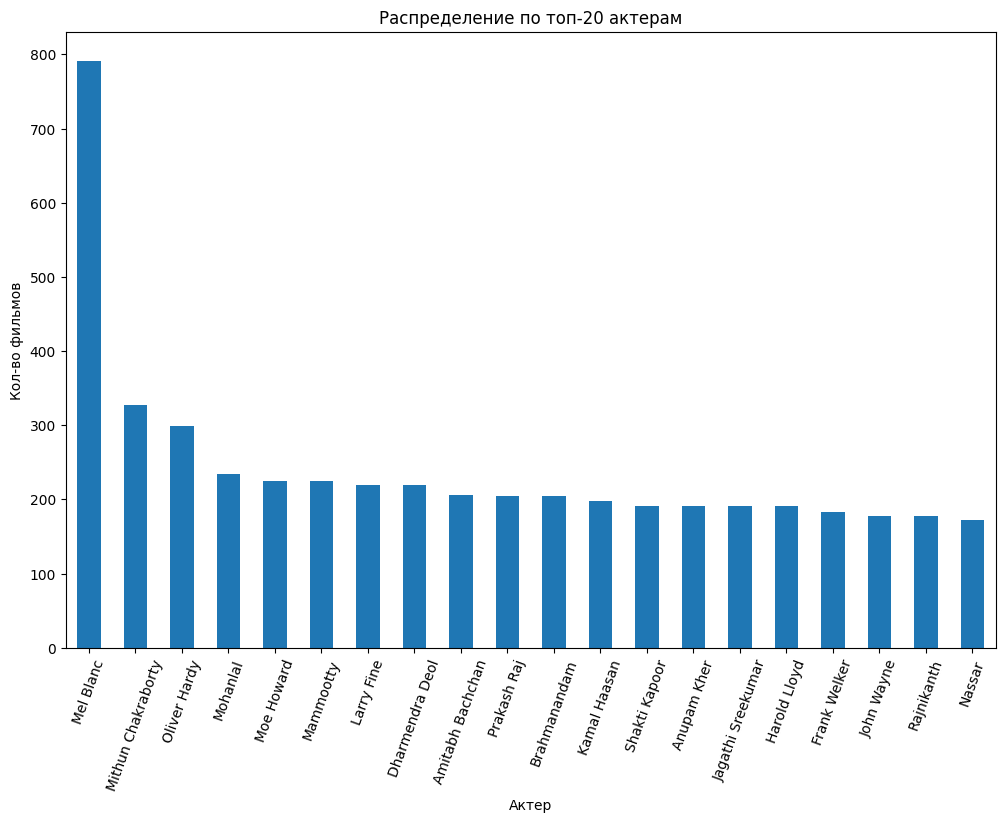

In [16]:
list_actors = character_metadata_df['Actor name'].value_counts().head(20).index
character_metadata_df['Actor name'].apply(lambda x: x if x in list_actors else np.nan).value_counts().plot(kind='bar', figsize=(12,8))
plt.title('Распределение по топ-20 актерам')
plt.xlabel('Актер')
plt.xticks(rotation=70)
plt.ylabel('Кол-во фильмов')
plt.show()

В датасете присутствуют не только актеры как действующие лица, но и актеры озвучки, например Mel Blanc является актером озвучки мультфильмов, поэтому он участвовал в таком большом количестве фильмов (озвучка мультиков)

### Распределение по возрасту актеров на момент релиза фильмов

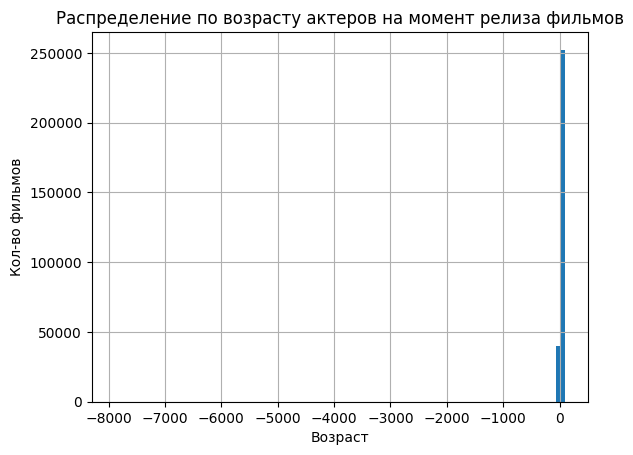

In [17]:
character_metadata_df['Actor age at movie release'].hist(bins=100)
plt.title('Распределение по возрасту актеров на момент релиза фильмов')
plt.xlabel('Возраст')
plt.ylabel('Кол-во фильмов')
plt.show()

В данных есть выбросы (отрицательные значения), отфильтруем их

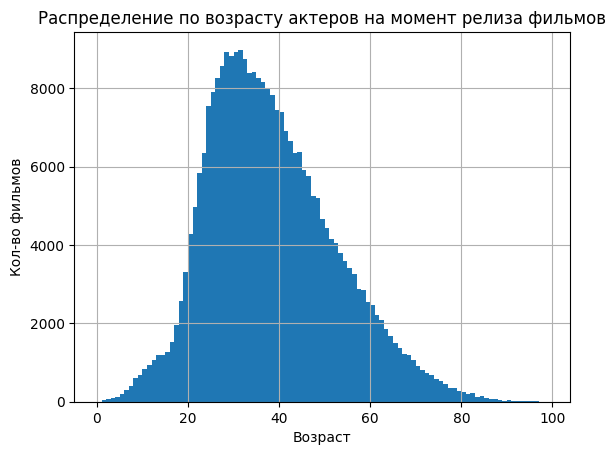

In [18]:
character_metadata_df = character_metadata_df[character_metadata_df['Actor age at movie release'] > 0]
character_metadata_df['Actor age at movie release'].hist(bins=np.arange(0, 100, 1))
plt.title('Распределение по возрасту актеров на момент релиза фильмов')
plt.xlabel('Возраст')
plt.ylabel('Кол-во фильмов')
plt.show()

# Распределения совместной информации 2 датасетов (фильмы-актеры)

### Распределение по соотношению полов (доля мужчин)

In [19]:
df = movie_metadata_df.merge(character_metadata_df, how='left', on=['Wikipedia_movie_ID'], indicator=True)

In [20]:
df['Actor gender'] = df['Actor gender'].replace({'F':0, 'M':1})

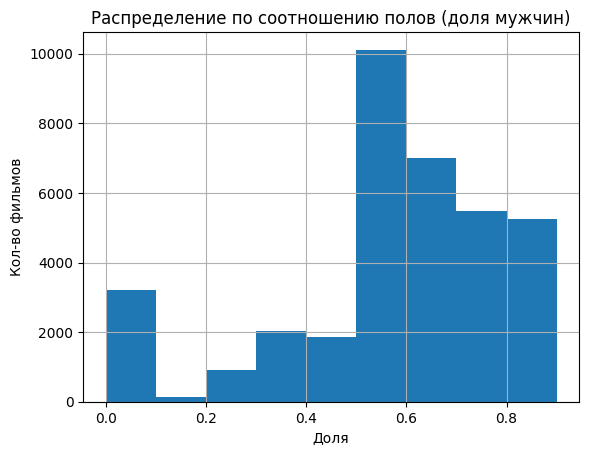

In [21]:
df.groupby('Wikipedia_movie_ID')['Actor gender'].mean().hist(bins=np.arange(0, 1, 0.1))
plt.title('Распределение по соотношению полов (доля мужчин)')
plt.xlabel('Доля')
plt.ylabel('Кол-во фильмов')
plt.show()

 Видим пик в 0, который говорит о том, что есть фильмы с одними женщинами, забавно, что с одними мужчинами фильмов нет.

 Еще видим что чаще всего в фильмах большинство актеров являются мужчинами.

Также интересное наблюдение - это пик в 0.5, что может соответствовать требованию равенства соотношений полов в фильмах

### Распределение по соотношению возрастов

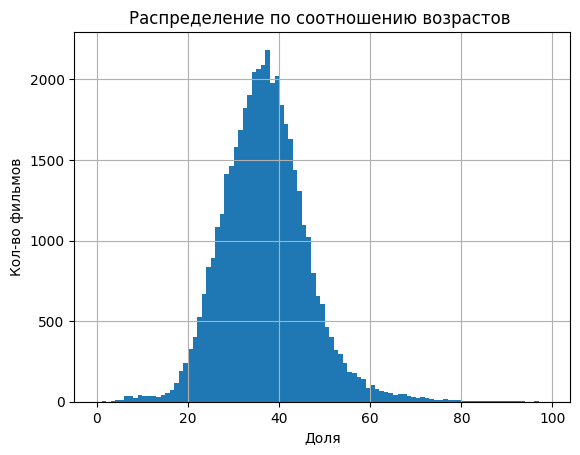

In [22]:
df.groupby('Wikipedia_movie_ID')['Actor age at movie release'].mean().hist(bins=np.arange(0, 100, 1))
plt.title('Распределение по соотношению возрастов ')
plt.xlabel('Доля')
plt.ylabel('Кол-во фильмов')
plt.show()

Интересное наблюдение - что это распределение отличается от распределения возрастов актеров на момент релиза фильмов

# Распределение длины кратких содержаний фильмов

### График распределения количества слов в кратких содержаниях

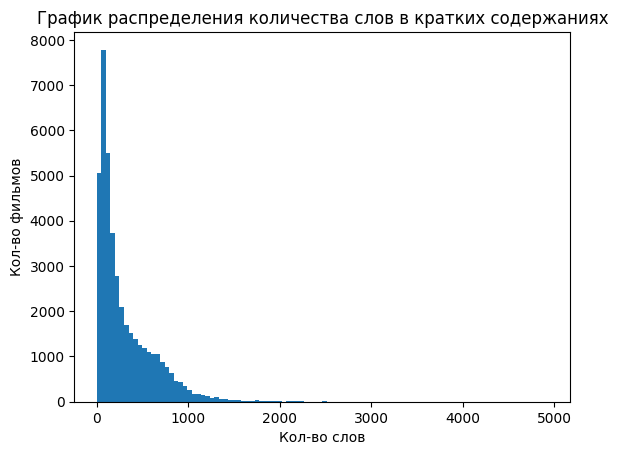

In [23]:
movies_df['movie_summary'].apply(lambda x: len(x.split())).hist(bins=100)
plt.title('График распределения количества слов в кратких содержаниях')
plt.xlabel('Кол-во слов')
plt.ylabel('Кол-во фильмов')
plt.grid()
plt.show()

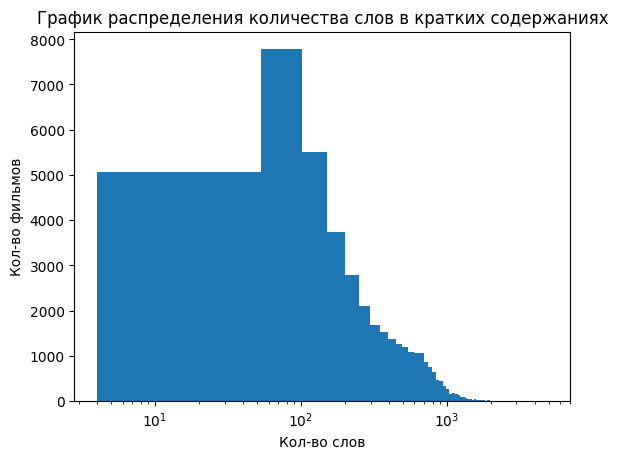

In [24]:
movies_df['movie_summary'].apply(lambda x: len(x.split())).hist(bins=100)
plt.title('График распределения количества слов в кратких содержаниях')
plt.xlabel('Кол-во слов')
plt.ylabel('Кол-во фильмов')
plt.grid()
plt.xscale('log')
plt.show()

Видим, что значения больше 10^3 - выбросы

Длина текстовых описаний в основном не превосходит 1500 слов, что примерно соответствует 2000 токенов для лингвистической модели (соответствует длине контекста большинства LLMs)